<a href="https://colab.research.google.com/github/molcan23/RBC_ks_neural_network/blob/main/rbc_9_types_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN for Coeffitients Prediction

## Imports

In [4]:
import os
import re
import numpy as np
import pandas as pd
from os import listdir
import tensorflow as tf
import matplotlib.pyplot as plt

# Import Libraries and packages from Keras
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Dense, LSTM, Dropout, Flatten, Reshape, TimeDistributed, Activation, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling1D, Bidirectional, ConvLSTM2D, BatchNormalization

### Mounting Google Drive

In [5]:
from google.colab import drive

drive.mount('/content/gdrive/')

path = '/content/gdrive/MyDrive/phd_UNIZA/simulations_output/'

Mounted at /content/gdrive/


## Constants and Variables

In [6]:
head = ["cycle",
        
        "rbc_center_position_x",
        "rbc_center_position_y",
        "rbc_center_position_z",
        
        "rbc_velocity_x",
        "rbc_velocity_y",
        "rbc_velocity_z",
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_min_z",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_y",
        "rbc_cuboid_x_max_z",

        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_min_z",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_y_max_y",
        "rbc_cuboid_y_max_z",

        "rbc_cuboid_z_min_x",
        "rbc_cuboid_z_min_y",
        "rbc_cuboid_z_min_z",
        "rbc_cuboid_z_max_x",
        "rbc_cuboid_z_max_y",
        "rbc_cuboid_z_max_z",

        "rbc_cuboid_x_min_vel_x",
        "rbc_cuboid_x_min_vel_y",
        "rbc_cuboid_x_min_vel_z",
        "rbc_cuboid_x_max_vel_x",
        "rbc_cuboid_x_max_vel_y",
        "rbc_cuboid_x_max_vel_z",

        "rbc_cuboid_y_min_vel_x",
        "rbc_cuboid_y_min_vel_y",
        "rbc_cuboid_y_min_vel_z",
        "rbc_cuboid_y_max_vel_x",
        "rbc_cuboid_y_max_vel_y",
        "rbc_cuboid_y_max_vel_z",

        "rbc_cuboid_z_min_vel_x",
        "rbc_cuboid_z_min_vel_y",
        "rbc_cuboid_z_min_vel_z",
        "rbc_cuboid_z_max_vel_x",
        "rbc_cuboid_z_max_vel_y",
        "rbc_cuboid_z_max_vel_z",

        "volume",
        "surface",
        "NaN" 
]

xy = [        
        "rbc_center_position_x",
        "rbc_center_position_y",
        
        "rbc_velocity_x",
        "rbc_velocity_y",
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_y",

        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_y_max_y",

        "rbc_cuboid_z_min_x",
        "rbc_cuboid_z_min_y",
        "rbc_cuboid_z_max_x",
        "rbc_cuboid_z_max_y",

        "rbc_cuboid_x_min_vel_x",
        "rbc_cuboid_x_min_vel_y",
        "rbc_cuboid_x_max_vel_x",
        "rbc_cuboid_x_max_vel_y",

        "rbc_cuboid_y_min_vel_x",
        "rbc_cuboid_y_min_vel_y",
        "rbc_cuboid_y_max_vel_x",
        "rbc_cuboid_y_max_vel_y",

        "rbc_cuboid_z_min_vel_x",
        "rbc_cuboid_z_min_vel_y",
        "rbc_cuboid_z_max_vel_x",
        "rbc_cuboid_z_max_vel_y",

        "volume",
        "surface",
]


xy_simple = [        
        "rbc_center_position_x",
        "rbc_center_position_y",
        
        "rbc_velocity_x",
        "rbc_velocity_y",
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_y",

        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_y_max_y",

        "rbc_cuboid_x_min_vel_x",
        "rbc_cuboid_x_min_vel_y",
        "rbc_cuboid_x_max_vel_x",
        "rbc_cuboid_x_max_vel_y",

        "rbc_cuboid_y_min_vel_x",
        "rbc_cuboid_y_min_vel_y",
        "rbc_cuboid_y_max_vel_x",
        "rbc_cuboid_y_max_vel_y",
]

#
xy_sized = [
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_y",
        
        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_y_max_y",

        'rbc_velocity_x', 
        'rbc_velocity_y',
        'rbc_cuboid_x_min_vel_x',
        'rbc_cuboid_x_min_vel_y',
        'rbc_cuboid_x_max_vel_x', 
        'rbc_cuboid_x_max_vel_y',
        'rbc_cuboid_y_min_vel_x',
        'rbc_cuboid_y_min_vel_y',
        'rbc_cuboid_y_max_vel_x', 
        'rbc_cuboid_y_max_vel_y',
        'x_x_size',
        'x_y_size',
        'y_x_size', 
        'y_y_size',
]





xy_reduced = [
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_y",
        
        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_y_max_y",

        'x_x_size',
        'y_y_size',
]

xy_reduced_standardize = [        
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_x_max_y",
        "rbc_cuboid_y_max_y",
        'x_x_size',
        'y_y_size',
]

xy_reduced_normalize = [                      
        "rbc_center_position_x",
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_max_x",
]






xz_reduced = [
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_z",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_z",
        
        "rbc_cuboid_z_min_x",
        "rbc_cuboid_z_min_z",
        "rbc_cuboid_z_max_x",
        "rbc_cuboid_z_max_z",

        'x_x_size',
        'z_z_size',
]

xz_reduced_standardize = [        
        "rbc_cuboid_x_min_z",
        "rbc_cuboid_z_min_z",
        "rbc_cuboid_x_max_z",
        "rbc_cuboid_z_max_z",
        'x_x_size',
        'z_z_size',
]

xz_reduced_normalize = [                      
        "rbc_center_position_x",
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_z_min_x",
        "rbc_cuboid_z_max_x",
]





xyz_reduced = [
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_min_z",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_x_max_y",
        "rbc_cuboid_x_max_z",

        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_min_z",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_y_max_y",
        "rbc_cuboid_y_max_z",

        "rbc_cuboid_z_min_x",
        "rbc_cuboid_z_min_y",
        "rbc_cuboid_z_min_z",
        "rbc_cuboid_z_max_x",
        "rbc_cuboid_z_max_y",
        "rbc_cuboid_z_max_z",
       
        'x_x_size',
        'y_y_size',
        'z_z_size',       
]

xyz_reduced_standardize = [       
        "rbc_cuboid_x_min_y",
        "rbc_cuboid_x_min_z",
        "rbc_cuboid_x_max_y",
        "rbc_cuboid_x_max_z",

        "rbc_cuboid_y_min_y",
        "rbc_cuboid_y_min_z",
        "rbc_cuboid_y_max_y",
        "rbc_cuboid_y_max_z",

        "rbc_cuboid_z_min_y",
        "rbc_cuboid_z_min_z",
        "rbc_cuboid_z_max_y",
        "rbc_cuboid_z_max_z",

        'x_x_size',
        'y_y_size',
        'z_z_size',
]

xyz_reduced_normalize = [                      
        
        "rbc_cuboid_x_min_x",
        "rbc_cuboid_x_max_x",
        "rbc_cuboid_y_min_x",
        "rbc_cuboid_y_max_x",
        "rbc_cuboid_z_min_x",
        "rbc_cuboid_z_max_x",
]

In [7]:
SELECTED_AXES = 'xy'
SELECTED_COLUMNS = xy_reduced
SELECTED_COLUMNS_TO_STANDARDIZE = xy_reduced_standardize
SELECTED_COLUMNS_TO_NORMALIZE = xy_reduced_normalize

# SELECTED_AXES = 'xz'
# SELECTED_COLUMNS = xz_reduced
# SELECTED_COLUMNS_TO_STANDARDIZE = xz_reduced_standardize
# SELECTED_COLUMNS_TO_NORMALIZE = xz_reduced_normalize

# SELECTED_AXES = 'xyz'
# SELECTED_COLUMNS = xyz_reduced
# SELECTED_COLUMNS_TO_STANDARDIZE = xyz_reduced_standardize
# SELECTED_COLUMNS_TO_NORMALIZE = xyz_reduced_normalize

# parameters

TS_LENGTH = 10
NUM_OF_RBC_TYPES = 3
LOSS_FN = 'mape'

START = 500
SAME_SIZE_OF_DF_FROM_SIMULATION = 2700
NUMBER_OF_AUGMENTATION = 30

SAVE_PATH = f'/content/gdrive/MyDrive/phd_UNIZA/NN_regression_ks/W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}'
if not os.path.exists(SAVE_PATH):
  os.makedirs(SAVE_PATH)

STANDARDIZE = True

number_of_cells = 54

name_of_simulation = 'three_types'

## Loading data about one RBC

In [8]:
df = pd.read_table(f"{path}/three_types/rbc0_sim{name_of_simulation}.dat", sep=" ", names=head[1:]).drop(['NaN'], axis=1).drop([0], axis=0).astype('float32')
df

,rbc_center_position_x,rbc_center_position_y,rbc_center_position_z,rbc_velocity_x,rbc_velocity_y,rbc_velocity_z,rbc_cuboid_x_min_x,rbc_cuboid_x_min_y,rbc_cuboid_x_min_z,rbc_cuboid_x_max_x,rbc_cuboid_x_max_y,rbc_cuboid_x_max_z,rbc_cuboid_y_min_x,rbc_cuboid_y_min_y,rbc_cuboid_y_min_z,rbc_cuboid_y_max_x,rbc_cuboid_y_max_y,rbc_cuboid_y_max_z,rbc_cuboid_z_min_x,rbc_cuboid_z_min_y,rbc_cuboid_z_min_z,rbc_cuboid_z_max_x,rbc_cuboid_z_max_y,rbc_cuboid_z_max_z,rbc_cuboid_x_min_vel_x,rbc_cuboid_x_min_vel_y,rbc_cuboid_x_min_vel_z,rbc_cuboid_x_max_vel_x,rbc_cuboid_x_max_vel_y,rbc_cuboid_x_max_vel_z,rbc_cuboid_y_min_vel_x,rbc_cuboid_y_min_vel_y,rbc_cuboid_y_min_vel_z,rbc_cuboid_y_max_vel_x,rbc_cuboid_y_max_vel_y,rbc_cuboid_y_max_vel_z,rbc_cuboid_z_min_vel_x,rbc_cuboid_z_min_vel_y,rbc_cuboid_z_min_vel_z,rbc_cuboid_z_max_vel_x,rbc_cuboid_z_max_vel_y,rbc_cuboid_z_max_vel_z,volume,surface
2000,32.448399,13.062350,8.326485,0.020506,-0.000040,-0.000026,28.554800,12.719492,8.285869,36.368404,13.407907,8.369804,32.059891,9.185813,8.724632,32.821655,16.939314,7.927630,30.791706,15.249967,6.763115,34.085606,10.879069,9.887869,0.020451,0.000702,0.000873,0.020697,-0.000762,-0.000963,0.019168,0.000014,0.000077,0.021486,-0.000106,-0.000136,0.019848,0.000315,-6.130968e-05,0.020857,-0.000403,0.000139,90.728622,133.005615
4000,34.763180,13.062197,8.329570,0.024739,0.000028,0.000069,30.879749,12.825916,8.402707,38.678356,13.301639,8.254764,34.916428,9.194132,8.743280,34.572685,16.936342,7.917813,33.053715,15.306187,6.765472,36.432110,10.825032,9.906028,0.025012,0.001293,0.001349,0.024474,-0.001258,-0.001260,0.023335,0.000021,0.000075,0.026036,0.000054,0.000089,0.024352,0.000734,1.295938e-04,0.024998,-0.000636,0.000141,90.718575,132.973907
6000,37.292320,13.066747,8.337736,0.025618,0.000060,0.000086,33.448631,12.965900,8.546241,41.166508,13.170130,8.127045,37.307648,9.195539,8.754022,37.233997,16.945356,7.925404,36.339161,15.426981,6.787828,38.195721,10.717277,9.908830,0.026115,0.001476,0.001502,0.025094,-0.001339,-0.001280,0.024262,0.000009,0.000131,0.026950,0.000115,0.000056,0.025484,0.000478,9.436736e-05,0.025702,-0.000324,0.000138,90.728790,132.851089
8000,39.864815,13.073532,8.345613,0.025785,0.000073,0.000069,36.009552,12.521410,7.829638,43.750366,13.630875,8.854249,39.745789,9.196630,8.767933,39.939346,16.957733,7.928006,38.907269,15.475667,6.803061,40.769203,10.685130,9.913312,0.025443,0.001483,0.001499,0.026123,-0.001353,-0.001367,0.024448,0.000017,0.000143,0.027112,0.000123,-0.000002,0.025824,0.000488,2.049291e-04,0.025724,-0.000314,-0.000044,90.746056,132.702469
10000,42.444984,13.081062,8.351546,0.025809,0.000075,0.000049,38.570034,12.672924,7.982332,46.350914,13.494288,8.716006,42.192467,9.199048,8.782172,42.652363,16.969049,7.925220,43.000740,15.600653,6.800741,43.336765,10.654060,9.901152,0.025741,0.001518,0.001528,0.025888,-0.001382,-0.001404,0.024471,0.000035,0.000140,0.027141,0.000100,-0.000052,0.025926,-0.000146,-2.877278e-05,0.025622,-0.000307,-0.000195,90.765503,132.547821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7626000,11909.727539,12.986670,12.614756,0.033824,0.000009,0.000080,11905.827148,12.933554,12.014547,11913.651367,13.033231,13.214984,11908.879883,10.513412,15.038949,11910.497070,15.525931,10.253169,11909.404297,14.048412,9.002452,11909.977539,11.993466,16.269367,0.033824,0.000655,0.001967,0.033867,-0.000640,-0.001854,0.034590,0.000141,0.000405,0.033085,-0.000176,-0.000292,0.032208,0.000093,-6.522826e-07,0.035479,-0.000149,0.000102,90.700394,133.118042
7628000,11913.110352,12.988057,12.623236,0.033837,0.000019,0.000089,11909.215820,12.998795,12.212664,11917.033203,12.971344,13.032394,11912.340820,10.528305,15.078862,11913.804688,15.508088,10.225223,11912.625977,14.057606,9.006082,11913.524414,11.979205,16.276485,0.033939,0.000649,0.001992,0.033770,-0.000601,-0.001801,0.034625,0.000157,0.000392

## Functions for boxplot graph

In [9]:
def percentage_difference(y_hat, y):
  return np.abs(((y_hat - y) / y) * 100)

In [10]:
def absolute_error(y_hat, y):
  return np.abs(y_hat - y)

In [11]:
def data_for_plot(pred, real):

  dir_labels = {}
  diff_fun = percentage_difference

  for i, j in zip(predictions_future, y_test):
    if str(j) in dir_labels.keys():
      dir_labels[str(j)].append(diff_fun(i[0], j))
    else:
      dir_labels[str(j)] = [diff_fun(i[0], j)]

  return [dir_labels[x] for x in sorted(dir_labels.keys())], dir_labels


In [12]:
def ks_boxplots(data, name, dir_labels, outliers): 
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, showfliers=outliers, showmeans=True)

    plt.title('Absolute Percentage Error by True Value of ks')
    ax.set_xlabel('Value of ks')
    ax.set_ylabel('Absolute Percentage Error')
    ax.set_xticklabels(labels=sorted(dir_labels.keys()))
    ax.grid()

    for i in range(len(data)):
      y = data[i]
      x = np.random.normal(i, 0.02, len(y))
      plt.plot(x+1, y, 'r.', alpha=0.2)

    plt.savefig(f'{SAVE_PATH}/{name}.png')
    plt.show()

    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, showfliers=outliers, showmeans=True)

    plt.title('Absolute Percentage Error by True Value of ks')
    ax.set_xlabel('Value of ks')
    ax.set_ylabel('Absolute Percentage Error')
    ax.set_xticklabels(labels=sorted(dir_labels.keys()))
    ax.grid()

    plt.savefig(f'{SAVE_PATH}/{name}_NO.png')
    plt.show()

## Transforming data into dataset

- format 
- augmentation
- saving on Drive



In [13]:
def standardize_columns(df, cols):
    for c in cols:
        df[c] = (df[c] - df[c].mean(axis=0)) / df[c].std(axis=0)
    return df

In [14]:
def augmentation(x, gaussian_noise_level=.001, offset_noise_level=.5):
        noise        = gaussian_noise_level * tf.random.normal(x.shape)
        offset_noise = 2.  * tf.random.uniform(x.shape) - 1.0
        x_result     = tf.convert_to_tensor(x) + noise + offset_noise_level * offset_noise
        return x_result

In [15]:
def create_training_examples(df, target, ts_length=10, selected_columns=xy_reduced, number_of_augmentation=10):
  """
  Split df into timeseries with length=ts_length and add target value to each mini-timeseries
  """
  training_data = []
  target_data = []

  for i in range(ts_length, df.shape[0], ts_length):
    sample = df.iloc[i-ts_length:i, :] 

    for field in SELECTED_COLUMNS_TO_NORMALIZE:
      sample[field] = sample[field].subtract(sample[field].min())
        
    sample = tf.convert_to_tensor(sample[SELECTED_COLUMNS])
    training_data.append(sample)
    target_data.append(target)

    for _ in range(number_of_augmentation):
      training_data.append(augmentation(sample))
      target_data.append(target)

  return training_data, target_data

# df = pd.read_table(f"{path}rbc0_sim{name_of_simulation}.dat", sep=" ", names=head[1:]).drop(['NaN'], axis=1).drop([0], axis=0).astype('float32')

# # calculation of height and width
# for ax1 in ['x', 'y', 'z']:
#       for ax2 in ['x', 'y', 'z']:
#         df[f'{ax1}_{ax2}_size'] = df[f'rbc_cuboid_{ax1}_max_{ax2}'] - df[f'rbc_cuboid_{ax1}_min_{ax2}']

# trd, tad = create_training_examples(df, 0, ts_length=3, number_of_augmentation=0)
# print(pd.DataFrame(np.array(trd[0])))
# print(pd.DataFrame(np.array(trd[1])))
# print(pd.DataFrame(np.array(trd[2])))

# # pd.concat([pd.DataFrame(np.array(trd[0])), pd.DataFrame(np.array(trd[1]))], ignore_index=True)

Next cell is commented due to unneccery execution. Needs to be runed only once per dataset. (long executio)

In [16]:
# # create datasets from dat files (at this point files are located in '.' folder)

# from google.colab import drive

# drive.mount('/content/gdrive/')

# # path = '/content/gdrive/MyDrive/phd_UNIZA/simulations_output/three_types/'
# # df = pd.read_table(f"{path}/three_types/rbc0_sim{name_of_simulation}.dat", sep=" ", names=head[1:]).drop(['NaN'], axis=1).drop([0], axis=0).astype('float32')

# training_data1 = []
# target_data1 = []

# df_all = pd.DataFrame()
# rbc_coeffitients = []
# number_of_cells = 0

# for simulation, coef in zip(['three_types', 'another_three_types', 'gap_three'],
#                             [[.3, .005, .03],
#                              [.15, .015, .009], 
#                              [.225, .1, .05]]):
    
#     full_path = f"{path}/{simulation}"
#     only_cell_files = sorted([f for f in listdir(full_path) if re.match("rbc[0-9]+_.+.dat", f)])
#     number_of_cells += len(only_cell_files)

#     for i, file_ in enumerate(only_cell_files):
#       # print(file_)
#       df = pd.read_table(f"{full_path}/{file_}", sep=" ", names=head[1:]).drop(['NaN'], axis=1).drop([0], axis=0)[START:SAME_SIZE_OF_DF_FROM_SIMULATION]
#       df = df.astype('float32')
#       df_all = pd.concat([df_all, df], ignore_index=True)
#       if re.match(f"(rbc0_|rbc1_|rbc2_|rbc3_|rbc4_|rbc5_).*", file_):
#         rbc_coeffitients.append(coef[0])
#       elif re.match(f"(rbc6_|rbc7_|rbc8_|rbc9_|rbc10_|rbc11_).*", file_):
#         rbc_coeffitients.append(coef[1])
#       else:
#         rbc_coeffitients.append(coef[2])

# # calculation of RBC height and width
# for ax1 in ['x', 'y', 'z']:
#       for ax2 in ['x', 'y', 'z']:
#         df_all[f'{ax1}_{ax2}_size'] = df_all[f'rbc_cuboid_{ax1}_max_{ax2}'] - df_all[f'rbc_cuboid_{ax1}_min_{ax2}']

# if STANDARDIZE:
#     df_all = standardize_columns(df_all, cols=SELECTED_COLUMNS_TO_STANDARDIZE)
#     df_all

# dataset_path = f'/content/gdrive/MyDrive/phd_UNIZA/simulations_output/dataset/W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}'
# if not os.path.exists(dataset_path):
#   os.makedirs(dataset_path)

# for i in range(0, number_of_cells):  # 52  # 48
#     print(i, "/", 54)
#     trd, tad = create_training_examples(df_all[i*(SAME_SIZE_OF_DF_FROM_SIMULATION - START):(i+1)*(SAME_SIZE_OF_DF_FROM_SIMULATION - START)],
#                                         rbc_coeffitients[i],
#                                         TS_LENGTH,
#                                         selected_columns=SELECTED_COLUMNS,
#                                         number_of_augmentation=NUMBER_OF_AUGMENTATION)
#     data_out = f'{dataset_path}/data_time_series_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}_rbc_{str(i)}.npy'
#     label_out = f'{dataset_path}/data_labels_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}_rbc_{str(i)}.npy'

#     np.save(data_out, np.array(trd))
#     np.save(label_out, np.array(tad))

#     training_data1 = training_data1 + trd
#     target_data1 = target_data1 + tad


## Loading dataset from Drive

In [17]:
dataset_path = f'/content/gdrive/MyDrive/phd_UNIZA/simulations_output/dataset/W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}'

training_data1 = np.empty([1, TS_LENGTH, len(SELECTED_COLUMNS)], dtype=float)
target_data1 = []

for i in range(number_of_cells):  # 52  # 48
    # print(i, "/", 54)
    data_out = f'{dataset_path}/data_time_series_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}_rbc_{str(i)}.npy'
    label_out = f'{dataset_path}/data_labels_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_X_{SELECTED_AXES}_rbc_{str(i)}.npy'
      
    trd = np.load(data_out)
    tad = np.load(label_out)
    print(trd.shape)
    training_data1 = np.append(training_data1, trd, axis=0)
    target_data1 = np.append(target_data1, tad, axis=0)

training_data1 = np.delete(training_data1, 0, axis=0)

(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)
(6789, 10, 10)


## Transforming dataset

In [18]:
training_data = np.array(training_data1)

target_data = np.array(target_data1)

In [19]:
training_data[0]

array([[ 0.        , -1.10436714,  0.        , -0.82278812,  0.        ,
        -1.07624531,  0.        , -0.80722463, -0.99481142,  1.08799386],
       [ 3.17895508, -1.07659841,  2.99475098, -0.76707798,  3.16223145,
        -1.0596621 ,  3.04833984, -0.82848489, -1.07614803,  0.93124396],
       [ 6.33776855, -1.18933988,  6.02355957, -0.60998887,  6.56311035,
        -1.04238558,  5.84204102, -0.84899521, -1.13355255,  0.77474838],
       [ 9.42858887, -1.17297888,  9.13879395, -0.63796186,  9.41308594,
        -1.02924287,  9.17028809, -0.86935127, -1.12277246,  0.63595217],
       [12.47033691, -1.25067127, 12.26794434, -0.63390362, 12.29968262,
        -1.01819026, 12.44042969, -0.88710845, -1.08417928,  0.51657695],
       [15.41040039, -1.17100167, 15.4786377 , -0.66282767, 15.22192383,
        -1.00960326, 15.6517334 , -0.90178204, -0.96468073,  0.42018583],
       [18.34631348, -1.15185773, 18.67773438, -0.69732499, 18.17553711,
        -1.00302327, 18.55529785, -0.91052759

In [20]:
# reshaping for CNN
training_data_CNN = np.reshape(training_data, [training_data.shape[0], training_data.shape[1], training_data.shape[2], 1])

In [21]:
print('X_train shape == {}.'.format(training_data.shape))

print('X_train shape == {}.'.format(training_data_CNN.shape))
print('y_train shape == {}.'.format(target_data.shape))

print(type(training_data))
print(type(training_data_CNN))

X_train shape == (366606, 10, 10).
X_train shape == (366606, 10, 10, 1).
y_train shape == (366606,).
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(training_data, target_data, test_size=0.1, shuffle=True)

In [23]:
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = sklearn.model_selection.train_test_split(training_data_CNN, target_data, test_size=0.1, shuffle=True)

In [24]:
dataset = tf.keras.utils.timeseries_dataset_from_array(
    X_train, y_train, TS_LENGTH, sequence_stride=10, sampling_rate=1,
    batch_size=32, shuffle=False, seed=None, start_index=None, end_index=None
)

for batch in dataset:
  inputs, targets = batch
  print(inputs.shape)
  break

(32, 10, 10, 10)


---

## Plotting function for training

Accuracy and loss plots

In [25]:
from keras import backend as K
# from sklearn.metrics import r2_score

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [26]:
def plot_learning_acc_loss(history, name=""):

    # if os.path.exists("./plots"):
    #     os.makedirs("./plots")

    # summarize history for accuracy
    # try:
    #   plt.plot(history.history['mean_squared_error'])
    #   plt.plot(history.history['val_mean_squared_error'])
    #   plt.title('model mean_squared_error')
    #   plt.ylabel('mean_squared_error')
    #   plt.xlabel('epoch')
    #   plt.legend(['train', 'validation'], loc='upper left')
    #   plt.savefig(f'{name}_model_mean_squared_error.png')
    #   plt.show()
    # except:
    #   try:
    #     plt.plot(history.history['mean_absolute_error'])
    #     plt.plot(history.history['val_mean_absolute_error'])
    #     plt.title('model mean_absolute_error')
    #     plt.ylabel('mean_absolute_error')
    #     plt.xlabel('epoch')
    #     plt.legend(['train', 'validation'], loc='upper left')
    #     plt.savefig(f'{name}_model_mean_absolute_error.png')
    #     plt.show()
    #   except:  # mean_absolute_percentage_error
    plt.plot(history.history['r2_keras'])
    plt.plot(history.history['val_r2_keras'])
    plt.title('r2_keras')
    plt.ylabel('mean_absolute_percentage_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig(f'{SAVE_PATH}/{name}_model_r2_keras.png')
    plt.show()


    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig(f'{SAVE_PATH}/{name}_model_loss.png')
    plt.show()

### File for saving mean absolut percentage error and loss

In [24]:
out_file = open(f'{SAVE_PATH}/statistics.txt', "a")
out_file.write("STATISTICS\n\n\n")
out_file.close()

---
## Regression NN trained on 9 types of ks coeffitcient of RBC


### Dense model

Using only Dense layers


In [25]:
# def dense_model(number_of_classes=2, learning_rate=1e-4, input_shape=None):
#   model = Sequential()
#   model.add(Flatten())
#   model.add(Dense(256, 'relu'))
#   model.add(Dropout(0.25))
#   model.add(Dense(128, 'relu'))
#   model.add(Dropout(0.25))
#   model.add(Dense(units=2, activation='softmax'))
#   model.compile(loss='categorical_crossentropy',
#                 optimizer=tf.keras.optimizers.Adam(learning_rate),
#                 metrics=['accuracy'])
  
#   return model

### LSTM simple model

In [26]:
def LSTM_model(learning_rate=1e-4, input_shape=None):
    model = Sequential([
        LSTM(
            units=256,
            return_sequences=True, 
            input_shape=(input_shape),
            # kernel_initializer='random_normal',
            kernel_initializer = tf.keras.initializers.GlorotNormal(seed=None),
            bias_initializer='zeros'
        ),
        Dropout(0.1),
        LSTM(units=64, return_sequences=True),
        Dropout(0.1),
        LSTM(units=32, return_sequences=True),
        Dropout(0.1),
        LSTM(units=10, return_sequences=True),
        Flatten(),
        Dropout(0.1),
        Dense(512),
        Dropout(0.1),
        Dense(256),
        Dense(1)
    ])

    # loss_f = tf.keras.losses.MeanSquaredError()
    # loss_f = tf.keras.losses.MeanAbsoluteError()
    loss_f = tf.keras.losses.MeanAbsolutePercentageError()
    # loss_f = tf.keras.losses.MeanSquaredLogarithmicError()
    
    # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate=1e-2,
    #     decay_steps=10000,
    #     decay_rate=0.9
    # )

    model.compile(
      loss=loss_f,
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=[r2_keras]
    )
    return model

In [27]:
model_1 = LSTM_model(learning_rate=1e-4, input_shape=X_train[0].shape)

In [28]:
EPOCHS = 1000

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=f'{SAVE_PATH}/weights_LSTM_{TS_LENGTH}.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history_1 = model_1.fit(X_train, y_train, shuffle=True, epochs=EPOCHS, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/1000
1032/1032 [==============================] - ETA: 0s - loss: 66.2452 - r2_keras: -0.4925
Epoch 00001: val_loss improved from inf to 51.00063, saving model to /content/gdrive/MyDrive/phd_UNIZA/NN_regression_ks/W_10_A_30_X_xy/weights_LSTM_10.h5
1032/1032 [==============================] - 179s 167ms/step - loss: 66.2452 - r2_keras: -0.4925 - val_loss: 51.0006 - val_r2_keras: 0.1978 - lr: 1.0000e-04
Epoch 2/1000
1032/1032 [==============================] - ETA: 0s - loss: 47.2084 - r2_keras: 0.2708
Epoch 00002: val_loss improved from 51.00063 to 46.32664, saving model to /content/gdrive/MyDrive/phd_UNIZA/NN_regression_ks/W_10_A_30_X_xy/weights_LSTM_10.h5
1032/1032 [==============================] - 169s 164ms/step - loss: 47.2084 - r2_keras: 0.2708 - val_loss: 46.3266 - val_r2_keras: 0.4691 - lr: 1.0000e-04
Epoch 3/1000
1032/1032 [==============================] - ETA: 0s - loss: 42.9810 - r2_keras: 0.4388
Epoch 00003: val_loss improved from 46.32664 to 40.98577, saving model

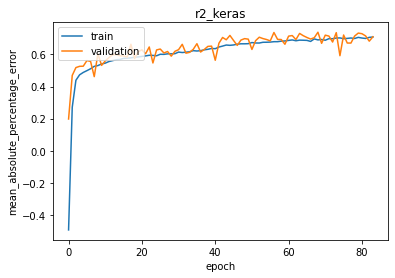

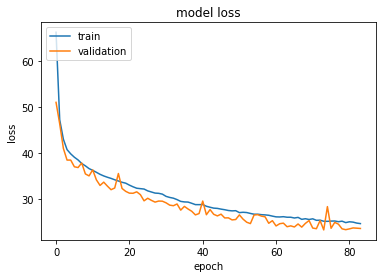




1146/1146 [==============================] - 15s 13ms/step - loss: 23.3688 - r2_keras: 0.7007
[23.368824005126953, 0.7007029056549072]


In [29]:
plot_learning_acc_loss(history_1,  f"LSTM-v0_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}")

print('\n\n')
score = model_1.evaluate(X_test, y_test,verbose=1)
print(f'{score}')

out_file = open(f'{SAVE_PATH}/statistics.txt', "a")
out_file.write(f"LSTM-v0 \t {score}")
out_file.close()

In [30]:
predictions_future = model_1.predict(X_test)

#### ERROR DISTRIBUTION

according the label

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


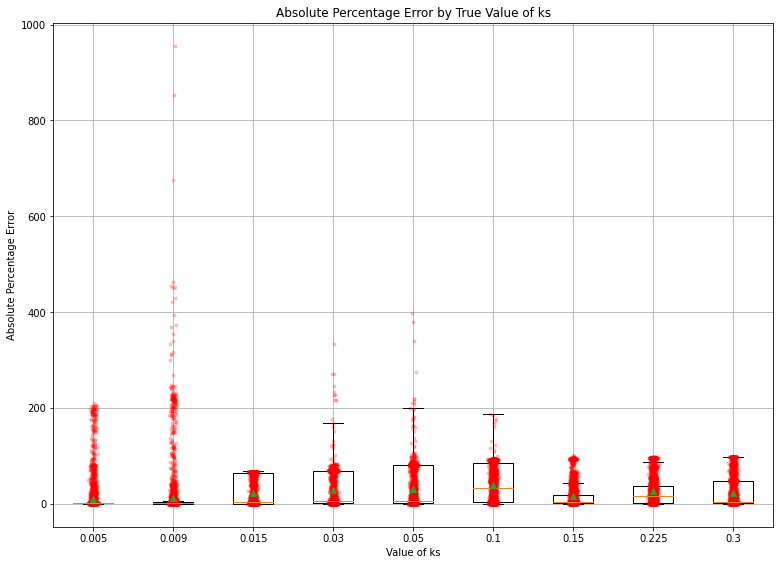

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


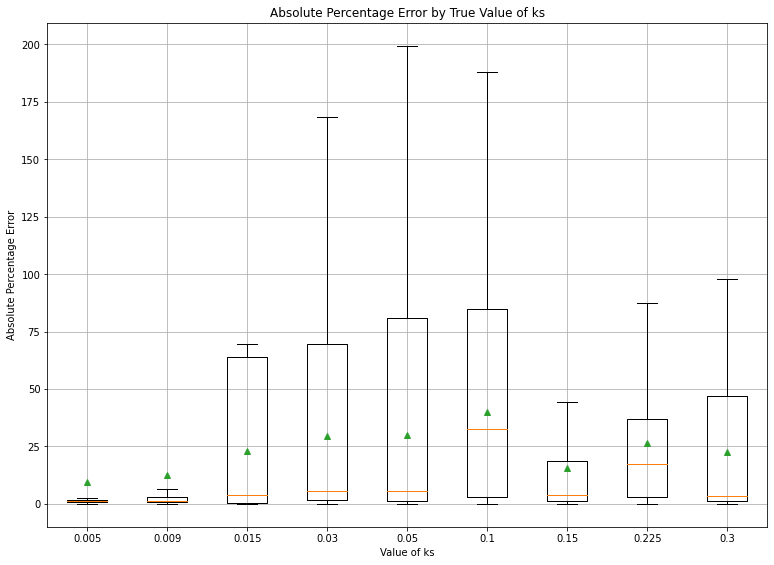

In [31]:
data, dir_labels = data_for_plot(predictions_future, y_test)
ks_boxplots(data,  f"LSTM-v0_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}_error", dir_labels, outliers=False)

### CNN-LSTM v.0


In [27]:
# TODO - better be parameters of function
DROPOUT_RATE = .1
N_NODES = 512
LSTM_NODES = 256

def CNN1_LSTM_model(number_of_classes=2, learning_rate=1e-4, input_shape=None):
    model = Sequential([
      Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu", input_shape=input_shape),
      Conv2D(filters=64, kernel_size=3, padding='same', activation="relu"),   # TODO tu bolo Conv1D nechtiac, ale ide
      MaxPooling2D(pool_size=2),
      TimeDistributed(Flatten()),
      LSTM(LSTM_NODES, activation="relu", return_sequences=False),
      Dense(N_NODES, activation="relu"),
      Dense(1, activation="linear"),                    
    ])

    
    # loss_f = tf.keras.losses.MeanSquaredError()
    # loss_f = tf.keras.losses.MeanAbsoluteError()
    loss_f = tf.keras.losses.MeanAbsolutePercentageError()
    # loss_f = tf.keras.losses.MeanSquaredLogarithmicError()
    
    # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate=1e-2,
    #     decay_steps=10000,
    #     decay_rate=0.9
    # )

    model.compile(
      loss=loss_f,
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=[r2_keras]
    )


    return model

In [28]:
model_12 = CNN1_LSTM_model(learning_rate=1e-4, input_shape=X_train_CNN[0].shape)

In [29]:
EPOCHS = 1000

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=f'{f"{SAVE_PATH}/CNN-LSTM-v0_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}"}.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')

history_12 = model_12.fit(X_train, y_train, shuffle=True, epochs=EPOCHS, validation_split=0.2, verbose=1, batch_size=64, callbacks=[es, rlr, mcp, tb])

Epoch 1/1000
 355/4125 [=>............................] - ETA: 7:08 - loss: 113.7577 - r2_keras: -0.2311

KeyboardInterrupt: ignored

In [ ]:
plot_learning_acc_loss(history_12, f"CNN-LSTM-v0_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_COLUMNS}")

print('\n\n')
score = model_12.evaluate(X_test, y_test, verbose=1)
print(f'{score}')

out_file = open(f'{SAVE_PATH}/statistics.txt', "a")
out_file.write(f"CNN-LSTM-v0 \t {score}")
out_file.close()

In [ ]:
predictions_future = model_12.predict(X_test)

In [ ]:
data, dir_labels = data_for_plot(predictions_future, y_test)
ks_boxplots(data,  f"CNN-LSTM-v0_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}_error", dir_labels, outliers=False)

In [ ]:
for i, j in zip(predictions_future, y_test):
  print(i, j)

### CNN-LSTM v.1


In [30]:
# TODO - better be parameters of function
DROPOUT_RATE = .1
N_NODES = 512
LSTM_NODES = 256

def CNN1_LSTM_model(number_of_classes=2, learning_rate=1e-4, input_shape=None):
    model = Sequential([
      Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu", input_shape=input_shape),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(filters=64, kernel_size=3, padding='same', activation="relu"),   # TODO tu bolo Conv1D nechtiac, ale ide
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=2),
      TimeDistributed(Flatten()),
      LSTM(LSTM_NODES, activation="relu", return_sequences=False),
      Dense(N_NODES, activation="relu"),
      Dense(1, activation="linear"),                    
    ])

    
    # loss_f = tf.keras.losses.MeanSquaredError()
    # loss_f = tf.keras.losses.MeanAbsoluteError()
    loss_f = tf.keras.losses.MeanAbsolutePercentageError()
    # loss_f = tf.keras.losses.MeanSquaredLogarithmicError()
    
    # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate=1e-2,
    #     decay_steps=10000,
    #     decay_rate=0.9
    # )

    model.compile(
      loss=loss_f,
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=[r2_keras]
    )


    return model

In [31]:
model_2 = CNN1_LSTM_model(learning_rate=1e-4, input_shape=X_train_CNN[0].shape)

In [ ]:
EPOCHS = 1000

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=f"{SAVE_PATH}/CNN-LSTM-v0_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')

history_2 = model_2.fit(X_train, y_train, shuffle=True, epochs=EPOCHS, validation_split=0.2, verbose=1, batch_size=64, callbacks=[es, rlr, mcp, tb])

Epoch 1/1000
4125/4125 [==============================] - ETA: 0s - loss: 56.5744 - r2_keras: 0.3411
Epoch 00001: val_loss improved from inf to 39.48983, saving model to /content/gdrive/MyDrive/phd_UNIZA/NN_regression_ks/W_10_A_30_X_xy/CNN-LSTM-v0_LF_mape_W_10_A_30_SC_xy.h5
4125/4125 [==============================] - 493s 119ms/step - loss: 56.5744 - r2_keras: 0.3411 - val_loss: 39.4898 - val_r2_keras: 0.4838 - lr: 1.0000e-04
Epoch 2/1000
4125/4125 [==============================] - ETA: 0s - loss: 38.6114 - r2_keras: 0.4950
Epoch 00002: val_loss improved from 39.48983 to 37.34261, saving model to /content/gdrive/MyDrive/phd_UNIZA/NN_regression_ks/W_10_A_30_X_xy/CNN-LSTM-v0_LF_mape_W_10_A_30_SC_xy.h5
4125/4125 [==============================] - 509s 123ms/step - loss: 38.6114 - r2_keras: 0.4950 - val_loss: 37.3426 - val_r2_keras: 0.5007 - lr: 1.0000e-04
Epoch 3/1000
4125/4125 [==============================] - ETA: 0s - loss: 36.0068 - r2_keras: 0.5311
Epoch 00003: val_loss improved f

In [ ]:
plot_learning_acc_loss(history_2, f"CNN-LSTM-v1_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}")

print('\n\n')
score = model_2.evaluate(X_test, y_test, verbose=1)
print(f'{score}')

out_file = open(f'{SAVE_PATH}/statistics.txt', "a")
out_file.write(f"CNN-LSTM-v1 \t {score}")
out_file.close()

In [ ]:
predictions_future = model_2.predict(X_test)

In [ ]:
data, dir_labels = data_for_plot(predictions_future, y_test)
ks_boxplots(data,  f"CNN-LSTM-v1_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}_error", dir_labels, outliers=False)

In [ ]:
for i, j in zip(predictions_future, y_test):
  print(i, j)

### CNN-LSTM v.2

- using Conv1D


In [ ]:
# TODO - better be parameters of function
DROPOUT_RATE = .1
N_NODES = 512
LSTM_NODES = 256

def CNNv2_LSTM_model(number_of_classes=2, learning_rate=1e-4, input_shape=None):
    model = Sequential([
      Conv1D(filters=64, kernel_size=len(SELECTED_COLUMNS), padding='same', activation="relu", input_shape=input_shape),
      BatchNormalization(),
      Activation('relu'),
      Conv1D(filters=64, kernel_size=len(SELECTED_COLUMNS), padding='same', activation="relu"),   # TODO tu bolo Conv1D nechtiac, ale ide
      BatchNormalization(),
      Activation('relu'),
      MaxPooling1D(pool_size=2),
      TimeDistributed(Flatten()),
      LSTM(LSTM_NODES, activation="relu", return_sequences=False),
      Dense(N_NODES, activation="relu"),
      Dense(1, activation="linear"),                    
    ])

    
    # loss_f = tf.keras.losses.MeanSquaredError()
    # loss_f = tf.keras.losses.MeanAbsoluteError()
    loss_f = tf.keras.losses.MeanAbsolutePercentageError()
    # loss_f = tf.keras.losses.MeanSquaredLogarithmicError()
    
    # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate=1e-2,
    #     decay_steps=10000,
    #     decay_rate=0.9
    # )

    model.compile(
      loss=loss_f,
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=[r2_keras]
    )

    return model

In [ ]:
model_2 = CNNv2_LSTM_model(learning_rate=1e-4, input_shape=X_train[0].shape)

In [ ]:
EPOCHS = 1000

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=f"{SAVE_PATH}/CNN1-LSTM-v2_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')

history_2 = model_2.fit(X_train, y_train, shuffle=True, epochs=EPOCHS, validation_split=0.2, verbose=1, batch_size=64, callbacks=[es, rlr, mcp, tb])

In [ ]:
plot_learning_acc_loss(history_2, f"CNN1-LSTM-v2_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}")

print('\n\n')
score = model_2.evaluate(X_test, y_test, verbose=1)
print(f'{score}')

out_file = open(f'{SAVE_PATH}/statistics.txt', "a")
out_file.write(f"CNN1-LSTM-v2 \t {score}")
out_file.close()

In [ ]:
predictions_future = model_2.predict(X_test)

In [ ]:
data, dir_labels = data_for_plot(predictions_future, y_test)
ks_boxplots(data,  f"CNN1-LSTM-v2_LF_{LOSS_FN}_W_{TS_LENGTH}_A_{NUMBER_OF_AUGMENTATION}_SC_{SELECTED_AXES}_error", dir_labels, outliers=False)

In [ ]:
for i, j in zip(predictions_future, y_test):
  print(i, j)

### RESNET like

In [47]:
class CNNBlock(tf.keras.layers.Layer):

  def __init__(self, out_chanels, kernel_size=3):
    super(CNNBlock, self).__init__()
    self.conv = tf.keras.layers.Conv2D(out_chanels, len(SELECTED_COLUMNS), padding='same')
    self.bn = tf.keras.layers.BatchNormalization()

  def call(self, input_tensor, training=False):
    x = self.conv(input_tensor)
    x = self.bn(x, training=training)
    x = tf.nn.relu(x)

    return x

In [48]:
class ResBlock(tf.keras.layers.Layer):

  def __init__(self, channels):
    super(ResBlock, self).__init__()
    self.conn1 = CNNBlock(channels[0])
    self.conn2 = CNNBlock(channels[1])
    self.conn3 = CNNBlock(channels[2])

    self.pooling = tf.keras.layers.MaxPooling2D()
    self.identity_mapping = tf.keras.layers.Conv2D(channels[1], 1, padding='same')

  def call(self, input_tensor, training=False):
    x = self.conn1(input_tensor, training=training)
    x = self.conn2(x, training=training)
    x = self.conn3(
        x + self.identity_mapping(input_tensor, training=training),
        training=training
    )

    return self.pooling(x)


class ResNet_Like(tf.keras.Model):

  def __init__(self, number_of_outputs=1):
    super(ResNet_Like, self).__init__()
    self.block1 = ResBlock([32,64,128])
    self.block2 = ResBlock([128,128,256])
    self.block3 = ResBlock([128,256,512])

    self.pool = tf.keras.layers.GlobalAveragePooling2D()  # same as Flatten alegidly
    self.classifier = tf.keras.layers.Dense(number_of_outputs)

  def call(self, input_tensor, training=False):
    x = self.block1(input_tensor, training=training)
    x = keras.layers.Dropout(.2)(x)
    x = self.block2(x, training=training)
    x = keras.layers.Dropout(.2)(x)
    x = self.block3(x, training=training)
    x = self.pool(x)

    return self.classifier(x)

  def model(self):
    x = keras.Input(sape=(28,28,1))
    return keras.Model(inputs=[x], outputs=self.call(x))

In [49]:
model_3 = ResNet_Like(number_of_outputs=1)

In [50]:
EPOCHS = 1000

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=f'{SAVE_PATH}/weights_ResNet.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')

In [51]:
# model_3.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=tf.keras.optimizers.Adam(1e-4),
#     metrics=["mean_squared_error"]
# )

model_3.compile(
  loss=tf.keras.losses.MeanAbsoluteError(),
  optimizer=tf.keras.optimizers.Adam(1e-4),
  metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

# model.summary()

history_3 = model_3.fit(
    X_train_CNN,
    y_train_CNN, 
    shuffle=True, 
    epochs=EPOCHS, 
    validation_split=0.2, 
    verbose=2, 
    batch_size=64, 
    callbacks=[es, rlr, mcp, tb]
)

Epoch 1/1000


ValueError: ignored

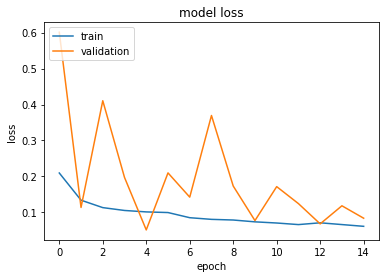




9/9 [==============================] - 1s 33ms/step - loss: 0.0786 - mean_absolute_error: 0.0786
[0.07864200323820114, 0.07864200323820114]


In [ ]:
plot_learning_acc_loss(history_3, "ResNet")

print('\n\n')
score = model_3.evaluate(X_test_CNN, y_test_CNN, verbose=1)
print(f'{score}')

out_file = open(f'{SAVE_PATH}/statistics.txt', "a")
out_file.write(f"ResNet \t {score}")
out_file.close()

In [ ]:
predictions_future = model_3.predict(X_test_CNN)

In [ ]:
for i, j in zip(predictions_future, y_test):
  print(i, j)

[0.30649036] 0.15
[0.26522994] 0.225
[0.27751085] 0.005
[0.13261746] 0.05
[0.28575572] 0.05
[0.11345769] 0.3
[0.25523382] 0.3
[0.09779118] 0.1
[0.2783326] 0.05
[0.0847549] 0.15
[0.21091358] 0.015
[0.32342246] 0.15
[0.16042523] 0.05
[0.31511965] 0.03
[0.24233885] 0.1
[0.22078563] 0.3
[0.0727254] 0.225
[0.12602912] 0.03
[0.3027036] 0.015
[0.16533493] 0.15
[0.27652562] 0.3
[0.1196803] 0.015
[0.27564254] 0.3
[0.04603131] 0.15
[0.10328992] 0.3
[0.19550015] 0.009
[0.31079975] 0.03
[0.21239866] 0.03
[0.26986176] 0.3
[0.12517704] 0.05
[0.27786833] 0.03
[0.21784608] 0.05
[0.11511578] 0.015
[0.22074668] 0.3
[0.2711049] 0.015
[0.21719365] 0.15
[0.11786328] 0.009
[0.30196896] 0.225
[0.2874422] 0.15
[0.27544993] 0.05
[0.17318659] 0.03
[0.10768406] 0.015
[0.21198712] 0.03
[0.10114442] 0.005
[0.26999062] 0.03
[0.07425709] 0.05
[0.23669763] 0.015
[0.30256206] 0.009
[0.20830058] 0.1
[0.07507379] 0.005
[0.12158559] 0.03
[0.16765137] 0.1
[0.21349941] 0.225
[0.27240446] 0.05
[0.11325417] 0.03
[0.26386112]

### Inception Network

In [ ]:

# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
 
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 
# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')